In [138]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score # output is persentile of test
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from scipy.io import loadmat
import itertools # def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
# Machine Learning  แบบมีผู้สอน หรือก็คือมีเฉลย หรือเรียกว่า class
 


Gradient Descent Algorithm ใช้หาค่าจากกราฟ 3D ที่จะหาค่าจากจุดที่ต่ำที่สุด หรือสูงที่สุดในกราฟ
Local Minima = ค่าต่ำแต่ไม่ต่ำสุด
Global Minima = ค่าต่ำสุด -> มีประสิทธิภาพดี


In [140]:
mnist_raw = loadmat("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset/mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw['label'][0]
}
x, y = mnist["data"], mnist["target"]
print(mnist["data"].shape)
print(mnist["target"].shape)

(70000, 784)
(70000,)


In [141]:
# Training , Test
    #  ตำแหน่งที่ 1-60000 -> Training
    #  60001 - 70000 -> Test
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[:60000]


In [142]:
# Class: 0 - 9
# Binary Calssification: True or False
predict_num = 5000
y_train_6 = (y_train==6)
y_test_6 = (y_test==6)

print(y_train)

print(y_train_6.shape, y_train_6) # The value equals 0 will transfer to True
print(y_test_6.shape, y_test_6)

[0. 0. 0. ... 9. 9. 9.]
(60000,) [False False False ... False False False]
(60000,) [False False False ... False False False]


In [143]:
# Model (SGD)
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_6)

SGDClassifier()

In [144]:
# Is predict_num in group of class 0
def displayImage(x):
    plt.imshow(x.reshape(28,28),
    cmap=plt.cm.binary,
    interpolation="nearest")
    plt.show()

def displayPredict(clf, actually_y, x):
    print(f"Actually: {actually_y}")
    print(f"Prediction: {clf.predict([x])[0]}")

def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 5"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

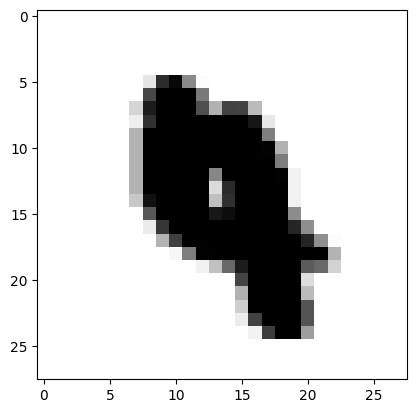

In [145]:
displayImage(x_test[predict_num])


In [146]:
displayPredict(sgd_clf, y_test_6[predict_num], x_test[predict_num])

Actually: False
Prediction: False


In [147]:
# Cross Validation Test
    # ทดสอบประสิทธิภาพของโมเดล ด้วยการทดบลองซ้ำ ๆ

score = cross_val_score(sgd_clf,x_train,y_train_6,cv=3, scoring="accuracy") # cv = means try to test 3 times
print(score)

[0.96095 0.94635 0.98935]


In [148]:
# Confusion Matrix
    # แสดงข้อผิดพลาดของการพยากรณ์
    # แสดงค่าเป็น การประเมินโมเดลการจำแนก เป็น matrix 2x2 
    # ค่าจริงแนว row ค่าพยากรณ์ คือ แนว column
    # [[ True Positives = ค่าจริงถูก ค่าพยากรณ์ถูก     False Negatives = ค่าจริงถูก ค่าพยากรณ์ผิด
    #    False Positives = ค่าจริงผิด ค่าพยากรณ์ถูก    True Negatives = ค่าจริงผิด ค่าพยากรณ์ผิด ]]
y_train_predict = cross_val_predict(sgd_clf, x_train, y_train_6, cv=3)
cm = confusion_matrix(y_train_6, y_train_predict) # เทียบค่าว่าคลาดเคลื่อนเท่าไหร่
print(cm)

[[52031  2051]
 [  544  5374]]


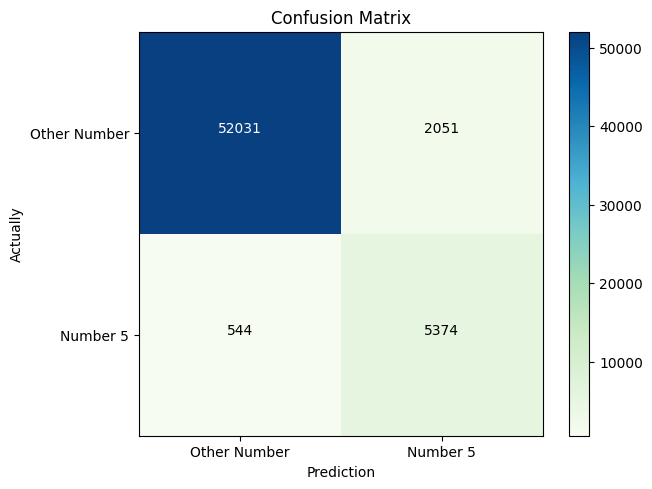

In [149]:
plt.figure() # what's means?
displayConfusionMatrix(cm)

In [152]:
# Precision, Recall, F1-Score
y_test_predict = sgd_clf.predict(x_test)
classes = ["Other Number", "Number 6"]
print(classification_report(y_test_6, y_test_predict,target_names = classes))
print(f"accuracy Score = {accuracy_score(y_test_6, y_test_predict)*100}")

ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]